- - - -
# Quadratic Drag With Horizontal and Vecrtical Motion

source code - https://github.com/veillette/jupyterTutorials/solvingDE.ipynb  

- - - -

Martin Veillette @ Berea College

- - - -

## Solving a first order differential equation numerically

Consider a baseball thrown with velocity 30 m/s (about 70 mi/h) at 50â¦ above the
horizontal from a high cliff. Find its trajectory for the first eight seconds of flight and compare
with the corresponding trajectory in a vacuum. If the same baseball was thrown with the same
initial velocity on horizontal ground how far would it travel before landing? That is, what is its
horizontal range?



We would like to solve the differential equations
$$m \frac{d v_x}{dt} = - c \sqrt{ v_x^2 + v_y^2} v_x ,$$ 
$$m \frac{d v_y}{dt} = - m g - c \sqrt{ v_x^2 + v_y^2} v_y$$

In [135]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [136]:
import numpy as np
from numpy import cos, sin, sqrt, arange, pi

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14
#get_ipython().magic('matplotlib inline') # inline plotting

In [165]:
# parameters
dt = 0.01
tmax = 3.0
g = 9.8
m = 0.150
c = 0.02;

timeRange = arange(0, tmax, dt);

# initial conditions
initialAngle = 50 * pi/180;
speed = 30.0
vx = speed * cos (initialAngle)
vy = speed * sin (initialAngle)
x = 0
y = 0

# storing arrays
vxs = []
vys = []

xs = []
ys = []

# loop over time
for t in timeRange:
     ax = - c/m * sqrt( vx**2 +vy**2)*vx
     ay = - g -c/m * sqrt( vx**2 +vy**2)*vy
    
     x = x + vx * dt + 1/2 * ax * dt**2
     y = y + vy * dt + 1/2 * ay * dt**2
    
     vx = vx + ax * dt
     vy = vy + ay * dt

     # storing results 
     vxs.append(vx)
     vys.append(vy)
    
     xs.append(x)
     ys.append(y)
        

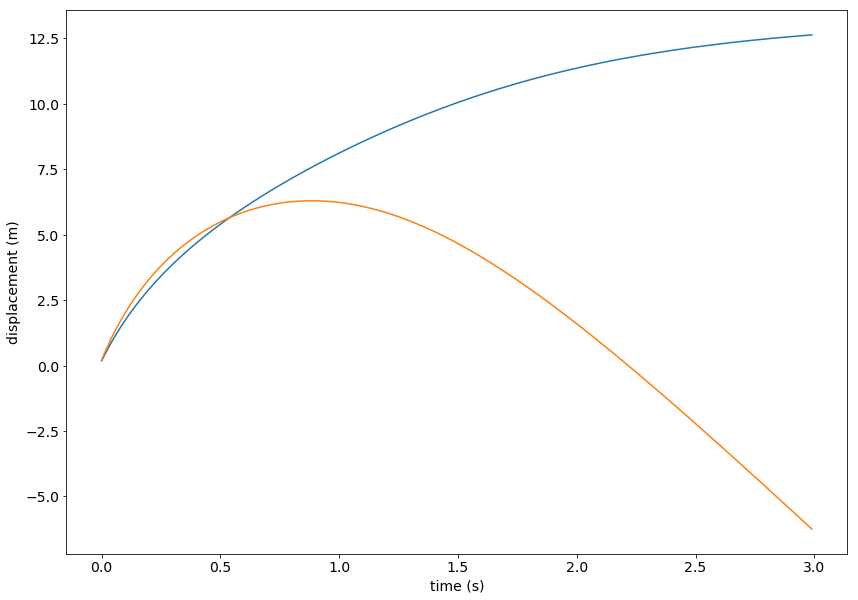

In [166]:
# plot the solution 
plt.plot(timeRange, xs)
plt.plot(timeRange, ys)
plt.ylabel('displacement (m)')
plt.xlabel('time (s)')

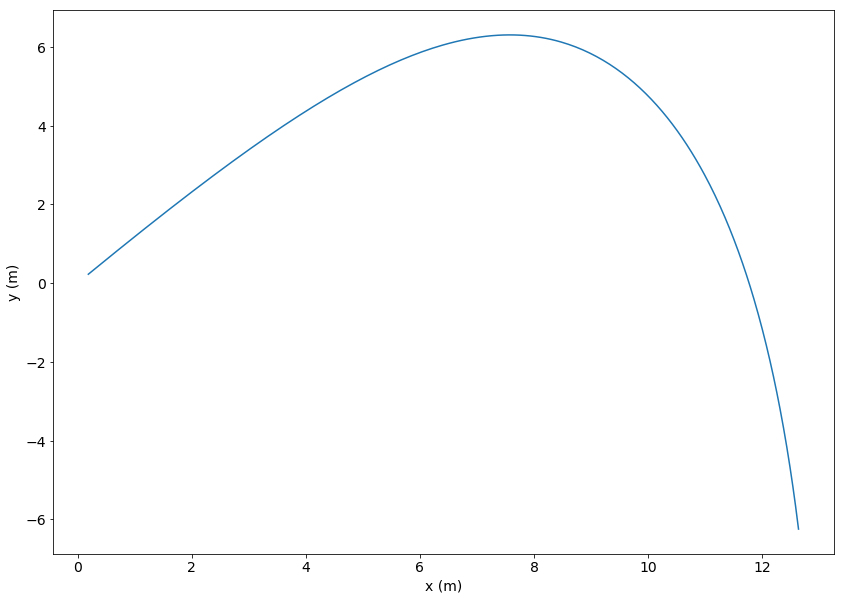

In [167]:
# trajectory 
plt.plot(xs,ys)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

We clearly see that the range is approximatley 12 m. Can we be more precise?

In [168]:
r= np.vstack([xs,ys])

In [181]:
# maximum height
maxHeight=np.max(ys)
maxHeight

6.2999483126132372

In [182]:
yIndex=ys.index(maxHeight)
yIndex

88

In [171]:
np.argmax(ys)

88

In [183]:
# time at maximum height
timeRange[yIndex]

0.88

In [184]:
# x position at maximum height
xs[yIndex]

7.5595650150786637

In [174]:
# create numpy arrays
x=np.array(xs)
y=np.array(ys)

In [175]:
xIndex=np.min(np.where(y<0))

In [179]:
timeOfFlight = timeRange[xIndex]
timeOfFlight

2.2200000000000002

In [177]:
xRange = x[xIndex]
xRange

11.774994708653642

In [178]:
x[xIndex-1]

11.758427726611741